<a href="https://colab.research.google.com/github/thual/POM-ch3-equationdAlembert/blob/main/equationdAlembert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemples de solutions de de l'équation de d'Alembert



On simule des exemples de l'équation de D'Alembert:
$${\partial^2 \psi \over \partial t^2} (x,t) = c^2 \, {\partial^2\psi \over \partial x^2} (x,t)\,$$
où $\psi(x,t)$ peut représenter de nombreux champs physiques (déplacements longitudinaux des particules d'un barreau élastique, déplacements transversaux d'une corde tendue, champ électrique le long d'un coaxial, angles de torsion, etc.)

On place dans le cas d'un milieu infini mais on visualise les solutions dans un intervalle $[0,L]$. Les exemples suivants sont considérés. 

* Séparation de deux pulses $\psi(x,t) = {1\over 2} f(x-ct) + {1\over 2} f(x+ct) $ où $f(X)$ a la forme d'un pulse. 
* Rencontre de deux pulses d'amplitudes égales $\psi(x,t) =  f(x-ct+L) +  f(x+ct-L) $ où $f(X)$ a la forme d'un pulse. 
* Rencontre de deux pulses d'amplitudes inégales $\psi(x,t) = 0.7 \, f(x-ct+L) + 0.3 \, f(x+ct-L) $ où $f(X)$ a la forme d'un pulse. 
* Onde progressive monochromatique $\psi(x,t)=f(x-ct)$ où $f(X) = A \cos(kX)$  
* Rencontre de deux demi-ondes progressive monochromatiques  d'amplitudes égales $\psi(x,t) =  f(x-ct+L) +  f(x+ct-L) $.
* Onde stationnaire $\psi(x,t) = A \cos(k_n x) \cos(\omega_n t)$ avec $k_n = n \pi /L$ et $n$ entier ou demi-entier
* Onde stationnaire $\psi(x,t) = A \sin(k_n x) \cos(\omega_n t)$ avec $k_n = n \pi /L$ et $n$ entier ou demi-entier




 

# Nouvelle section

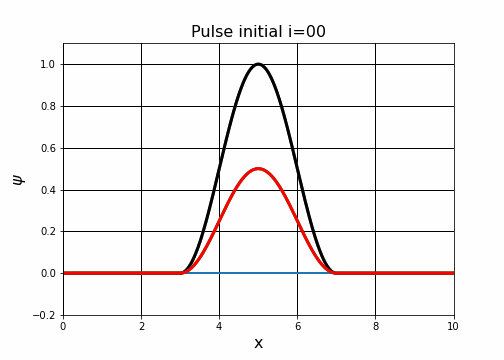

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme !



In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

print("d'Alembert")
# Petits outils
# ================================================

def zfi(x,le=2):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a

# Signaux de base
# ================================================

def pulse(a,d):
    # Pulse de taille d sur l'axe a
    al=0*a[a<-d]; ac=a[np.abs(a)<=d]; ar=0*a[a>d];
    k=np.pi/d; fc=.5*(1+np.cos(k*ac));
    f=np.concatenate((al,fc,ar))
    return f

def leftsin(a,k):
    # Sinusoïde venant de la gauche 
    al=a[a<=0]; ar=0*a[a>0];
    fl=-np.sin(k*al);
    f=np.concatenate((fl,ar))
    return f

def rightsin(a,k):
    # Sinusoïde venant de la droite    
    al=0*a[a<=0]; ar=a[a>0];
    fr=np.sin(k*ar);
    f=np.concatenate((al,fr))
    return f

# Animations d'ondes
# ================================================

def AniPulseInitial():
    global Time, name
    global signal,signalleft,signalright,signalinit,ymin,ymax  #animationbothwith
    name="Pulse initial"
    # Pulse comme condition initiale
    Time=.7*L/c;
    ymin=-.2; ymax=1.1;
    # signal 
    def signalinit(a):
        xi=pulse(-L/2+a,d)
        return xi
    def signal(a,t):
        xi=.5*pulse(-L/2+a-c*t,d)+.5*pulse(-L/2+a+c*t,d)
        return xi
    def signalleft(a,t):
        xi=.5*pulse(-L/2+a+c*t,d)
        return xi
    def signalright(a,t):
        xi=.5*pulse(-L/2+a-c*t,d)
        return xi
    ani=Gifanim(anibothwith)
    return ani


def AniDeuxpulsesEgaux():
    # Deux pluses de même taille
    global Time, name
    global signal,signalleft,signalright,ymin,ymax  #animationboth
    name="Deux pulses egaux"
    Time=(L+2*d)/c; 
    ymin=-.2; ymax=1;
    # signal 
    def signal(a,t):
        xi=.5*pulse(a+d-c*t,d)+.5*pulse(a-L-d+c*t,d)
        return xi
    def signalleft(a,t):
        xi=.5*pulse(a-L-d+c*t,d)
        return xi
    def signalright(a,t):
        xi=.5*pulse(a+d-c*t,d)
        return xi
    ani=Gifanim(aniboth)
    return ani

def AniDeuxpulsesInegaux():
    # Deux pulses inégaux
    global Time, name
    global signal,signalleft,signalright,ymin,ymax  #animationboth
    name="Deux pulses inegaux"
    Time=(L+2*d)/c; 
    ymin=-.2; ymax=1;
    # signal 
    def signal(a,t):
        xi=.7*pulse(a+d-c*t,d)+.3*pulse(a-L-d+c*t,d)
        return xi
    def signalleft(a,t):
        xi=.3*pulse(a-L-d+c*t,d)
        return xi
    def signalright(a,t):
        xi=.7*pulse(a+d-c*t,d)
        return xi
    ani=Gifanim(aniboth)
    return ani

def AniProgressive():
    # Onde progressive monochromatique
    global Time, name
    global signal, ymin, ymax #animation
    global n
    name="Progressive cos n"+zfi(n)
    Time=2*L/(n*c); 
    k=n*np.pi/L; omega=k*c;
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.cos(k*a-omega*t)
        return xi
    ani=Gifanim(anisingle)
    return ani

def AniOndeStatioMeet():
    # Onde stationnaire sinus
    global Time, name
    global signal,signalleft,signalright,ymin,ymax  #animationboth
    name="Onde stationnaire"
    Time=2*L/c; 
    k=4*np.pi/L;
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=.5*rightsin(-L+a+c*t,k)+.5*leftsin(a-c*t,k)
        return xi
    def signalleft(a,t):
        xi=.5*rightsin(-L+a+c*t,k)
        return xi
    def signalright(a,t):
        xi=.5*leftsin(a-c*t,k)
        return xi
    ani=Gifanim(aniboth)
    return ani

def AniOndeStatioCos():
    # Onde stationnaire cosinus    
    global Time, name
    global signal, ymin, ymax #animation
    global n
    name="Stationnaire cosinus n="+zfi(n)
    Time=2*L/(n*c);
    k=n*np.pi/L; omega=k*c;
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.cos(k*a)*np.cos(omega*t+np.pi/2)
        return xi
    ani=Gifanim(anisingle)
    return ani

def AniOndeStatioSin():
    print("AniOndeStatioSin")
    # Animation onde stationnaire
    global Time, name
    global signal, ymin, ymax #animation
    global n
    name="Stationnaire sinus n="+zfi(n)    
    Time=2*L/(n*c);
    k=n*np.pi/L; omega=k*c;
    ymin=-1; ymax=1;
    # signal 
    def signal(a,t):
        xi=np.sin(k*a)*np.cos(omega*t+np.pi/2)
        return xi
    ani=Gifanim(anisingle)
    return ani

# Fonction d'animations appelées par FuncAnimation
# ================================================

def anisingle(i):
    # Animation d'un seul signal
    global Time, name
    global signal, ymin, ymax #animation
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    # signal
    t=dt*i;
    xicont=signal(acont,t)
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    #print(title)
    ax.set_xlabel('x',fontsize=16 )
    ax.set_ylabel(r'$\psi$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Tracé du signal
    ax.plot(acont,xicont,color='black',linewidth=3)   
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        plt.savefig(namei)


def aniboth(i):
    # Animation de deux signaux
    global Time, name
    global signal,signalleft,signalright,ymin,ymax  #animationboth
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    # signal    
    t=dt*i;
    xicont=signal(acont,t)
    xileft=signalleft(acont,t)
    xiright=signalright(acont,t)
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    #print(title)
    ax.set_xlabel('x',fontsize=16 )
    ax.set_ylabel(r'$\psi$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Tracé du signal
    ax.plot(acont,xicont,color='black',linewidth=3)
    ax.plot(acont,xileft,color='green',linewidth=3)
    ax.plot(acont,xiright,color='red',linewidth=3)
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        plt.savefig(namei)


def anibothwith(i):
    # Animation de deux signaux et plot de la condition initiale
    global Time, name
    global signal,signalleft,signalright,signalinit,ymin,ymax  #animationbothwith
    acont=np.linspace(0,L,501);
    dt=Time/Nt
    # signal
    t=dt*i;
    xicont=signal(acont,t)
    xileft=signalleft(acont,t)
    xiright=signalright(acont,t)
    xinit=signalinit(acont)
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    #print(title)
    ax.set_xlabel('x',fontsize=16 )
    ax.set_ylabel(r'$\psi$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    # Tracé du signal
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    ax.plot(acont,xinit,color='grey',linewidth=3)
    ax.plot(acont,xicont,color='black',linewidth=3)
    ax.plot(acont,xileft,color='green',linewidth=3)
    ax.plot(acont,xiright,color='red',linewidth=3)
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        plt.savefig(namei)

def Gifanim(anifunc):
    ani=FuncAnimation(fig,anifunc,frames=np.arange(0,Nt),interval=300,repeat=True)
    namegif=name+".gif"
    print("==================================")
    print("Simulation pour créer un gif animé")  
    ani.save(namegif,writer="pillow")
    print("Gif animé créé :",namegif)
    # Visualisation animée de la simulation 
    print("\nSimulation pour visualiser l'animation")   
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani  


# Paramètres à modifier:

**Type d'ondes :**

*   `FlagPulseInitial` : Deux pulses issus d'un pulse initial
*   `FlagDeuxpulsesEgaux` : Rencontre de deux pulses égaux
*   `FlagDeuxpulsesInegaux` : Rencontre de deux pulses inégaux
*   `FlagProgressive` : Onde progressive monochromatique (OPM)
*   `FlagOndeStatioMeet` : Rencontre de deux demi-OPM
*   `FlagOndeStatioCos` : Solution stationnaire en cosinus
*   `FlagOndeStatioSin` : Solution stationnaire en sinus

**Autres paramètres :**

*   `Nt` : Nombre d'images par les animations (20)
*   `d` : Emprise des pulses dans l'espace (2)
*   `n` : Numéro du mode stationnaire (2.5)
*   `FlagSavext` : Sauver les  des fichiers
*   `ext`: Extension des fichiers à sauver (.png, .pdf, .jpg, etc.)



In [ ]:
# Paramètres à changer
F=False; T=True

# Choix de l'animation 
## Affichage en ligne de la dernière uniquement
FlagPulseInitial=F
FlagDeuxpulsesEgaux=F
FlagDeuxpulsesInegaux=F
FlagProgressive=F
FlagOndeStatioMeet=F
FlagOndeStatioCos=F 
FlagOndeStatioSin=T   

# Paramètres pouvant être changézs
Nt=20 # Nombre d'images pour l'animation
d=2; # Taille des pulses
n=2.5; # Nombre d'onde
ext=".png"
FlagSavext=False # Création de fichier ext pour chaque image

# Paramètres qu'il n'est pas utile de changer
Na=501; # Nombre de points pour le tracé
L=10; # Longueur de l'intervalle
c=1; # Vitesse des ondes

# Paramètres dérivés
Time=2*L/c;  

# Figure preparation 
fig=plt.figure(1,figsize=(7,5))
ax=plt.subplot(1,1,1)

# Choix de l'animation
if FlagPulseInitial==T: ani=AniPulseInitial()  
if FlagDeuxpulsesEgaux==T: ani=AniDeuxpulsesEgaux()
if FlagDeuxpulsesInegaux==T: ani=AniDeuxpulsesInegaux()
if FlagProgressive==T: ani=AniProgressive()
if FlagOndeStatioMeet==T: ani=AniOndeStatioMeet()
if FlagOndeStatioCos==T: ani=AniOndeStatioCos()   
if FlagOndeStatioSin==T: ani=AniOndeStatioSin()
   

#plt.close()

# Animation 
# Cette commande doit rester la dernière pour être suivie d'effet
ani

AniOndeStatioSin
Simulation pour créer un gif animé
Gif animé créé : Stationnaire sinus n=2.5.gif

Simulation pour visualiser l'animation
